El KNeighborsClassifier es una implementación del algoritmo k‑Nearest Neighbors (k‑NN) para clasificación en la biblioteca scikit‑learn de Python. A continuación encontrarás una descripción analítica y precisa de sus fundamentos, funcionamiento, parámetros clave y un ejemplo práctico.

📐 Fundamento teórico
Principio básico
k‑NN es un método de clasificación basado en instancia (lazy learning): no construye un modelo explícito durante el entrenamiento, sino que almacena todo el conjunto de entrenamiento.

Proceso de predicción

Para clasificar un nuevo punto 
𝑥
x, calcula la distancia (por defecto Euclidiana) entre 
𝑥
x y todos los ejemplos etiquetados del conjunto de entrenamiento.
Selecciona los k ejemplos más cercanos (“vecinos”).
Asigna la clase mayoritaria entre esos vecinos (votación por mayoría).
Ventajas

Intuitivo y fácil de implementar.
No requiere suposiciones sobre la distribución de datos (no paramétrico).
Limitaciones

Costoso computacionalmente en predicción si el dataset es grande (O(n)).
Sensible a la escala de características (recomendable normalizar/estandarizar).
Rendimiento afectado por valores atípicos y elección de k.
⚙️ Uso en scikit‑learn
Importación y creación
python
Copiar
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(
    n_neighbors=5,           # número de vecinos (k)
    weights='uniform',       # 'uniform' o 'distance'
    metric='minkowski',      # métrica de distancia ('euclidean' si p=2)
    p=2                      # parámetro de la métrica Minkowski
)
Parámetros clave
Parámetro	Descripción	Valor por defecto
n_neighbors	Número de vecinos a considerar	5
weights	Estrategia de ponderación: 'uniform' (igual) o 'distance' (más peso a vecinos cercanos)	'uniform'
metric	Métrica de distancia (p.ej. 'euclidean', 'manhattan', 'minkowski')	'minkowski'
p	Parámetro para Minkowski (p=2 → Euclidiana; p=1 → Manhattan)	2
algorithm	Método para búsqueda de vecinos ('auto', 'ball_tree', 'kd_tree', 'brute')	'auto'
🔍 Ejemplo práctico
python
Copiar
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Cargar datos
X, y = load_iris(return_X_y=True)

# División entrenamiento / prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Normalización (recomendado)
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el clasificador
knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(X_train_scaled, y_train)

# Predecir y evaluar
y_pred = knn.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
📊 Cuándo usarlo
Cuando tengas datos con baja dimensionalidad (< 20 features).
Si buscas un método interpretable y no tienes restricciones de tiempo en predicción.
Para servir como baseline antes de modelos más complejos.
💡 Consejos de ajuste (hyperparameter tuning)
Parámetro	Rango típico	Objetivo
n_neighbors	1–30	Balance entre sesgo y varianza
weights	uniform / distance	Mejora precisión en datasets ruidosos
metric	euclidean, manhattan, minkowski	Ajustar según naturaleza de features
Puedes optimizar usando GridSearchCV o RandomizedSearchCV.

In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/camilousa/datasets/refs/heads/master/german_credit_data(2)(1).csv")
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving_accounts   817 non-null    object
 6   Checking_account  606 non-null    object
 7   Credit_amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


,id,Age,Job,Credit_amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [4]:
train, test = train_test_split(df, test_size=0.3, random_state=42)

In [21]:
X_train = df[["Age"]]
y_train = df["Risk"]
X_test = test[["Age"]]
y_test = test["Risk"]

model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=15)

In [22]:
# prompt: calcular accuracy en train

y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy en train:", accuracy_train)

Accuracy en train: 0.7


In [23]:
# prompt: calcular accuracy en test

y_pred_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy en test:", accuracy_test)


Accuracy en test: 0.6966666666666667


In [24]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report

# Training metrics
print("Training Metrics:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, y_pred_train))
print("\nClassification Report:")
print(classification_report(y_train, y_pred_train))

# Test metrics
print("\nTest Metrics:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

Training Metrics:

Confusion Matrix:
[[  0 300]
 [  0 700]]

Classification Report:
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00       300
        good       0.70      1.00      0.82       700

    accuracy                           0.70      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.49      0.70      0.58      1000


Test Metrics:

Confusion Matrix:
[[  0  91]
 [  0 209]]

Classification Report:
              precision    recall  f1-score   support

         bad       0.00      0.00      0.00        91
        good       0.70      1.00      0.82       209

    accuracy                           0.70       300
   macro avg       0.35      0.50      0.41       300
weighted avg       0.49      0.70      0.57       300



C:\Users\Diego\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Diego\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Diego\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

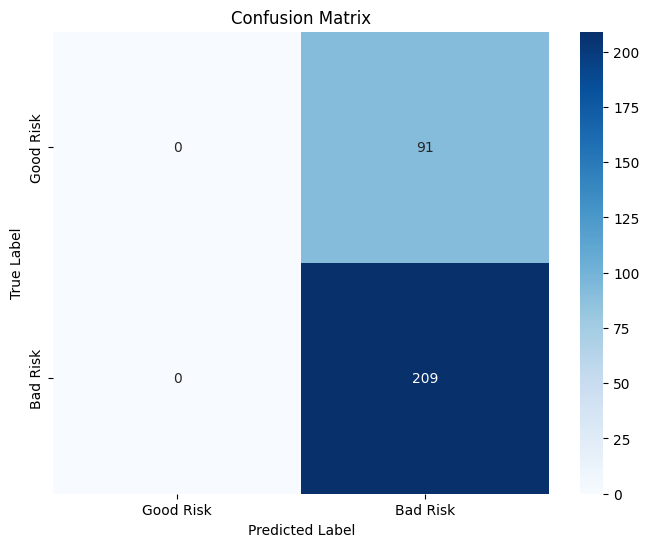

In [27]:
# prompt: crear mapa de calor con la matriz de confusion

import seaborn as sns
import matplotlib.pyplot as plt

# ... (your existing code) ...

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Good Risk', 'Bad Risk'], yticklabels=['Good Risk', 'Bad Risk'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
